In [15]:
library(ssr)
library(caret)
library(randomForest)

In [16]:
roughContact <- read.csv('../../../data/RoughContact/newPulloffJan28th.csv', header = TRUE,  sep = ';')[, -1]
roughContactUnlabeled <- read.csv('../../../data/RoughContact/pulloff_unlabeled.csv', header = TRUE, sep = ',')[, -1]

set.seed(43957)

L <- split_train_test(roughContact[, -1], pctTrain = 80)
U <- roughContactUnlabeled[, -1]

[1] "Initial RMSE on testdata: 0.0399"
[1] "Iteration 1 (testdata) RMSE: 0.0560 Improvement: -40.38%"
[1] "Iteration 2 (testdata) RMSE: 0.0528 Improvement: -32.31%"
[1] "Iteration 3 (testdata) RMSE: 0.0505 Improvement: -26.59%"
[1] "Iteration 4 (testdata) RMSE: 0.0496 Improvement: -24.37%"
[1] "Iteration 5 (testdata) RMSE: 0.0490 Improvement: -22.82%"
[1] "Iteration 6 (testdata) RMSE: 0.0492 Improvement: -23.25%"
[1] "Iteration 7 (testdata) RMSE: 0.0501 Improvement: -25.55%"
[1] "Iteration 8 (testdata) RMSE: 0.0501 Improvement: -25.49%"
[1] "Iteration 9 (testdata) RMSE: 0.0497 Improvement: -24.58%"
[1] "Iteration 10 (testdata) RMSE: 0.0499 Improvement: -25.15%"
[1] "Iteration 11 (testdata) RMSE: 0.0496 Improvement: -24.19%"
[1] "Iteration 12 (testdata) RMSE: 0.0494 Improvement: -23.76%"
[1] "Iteration 13 (testdata) RMSE: 0.0492 Improvement: -23.18%"
[1] "Iteration 14 (testdata) RMSE: 0.0491 Improvement: -23.03%"
[1] "Iteration 15 (testdata) RMSE: 0.0488 Improvement: -22.40%"
[1] "Itera

[1] 0.04707144

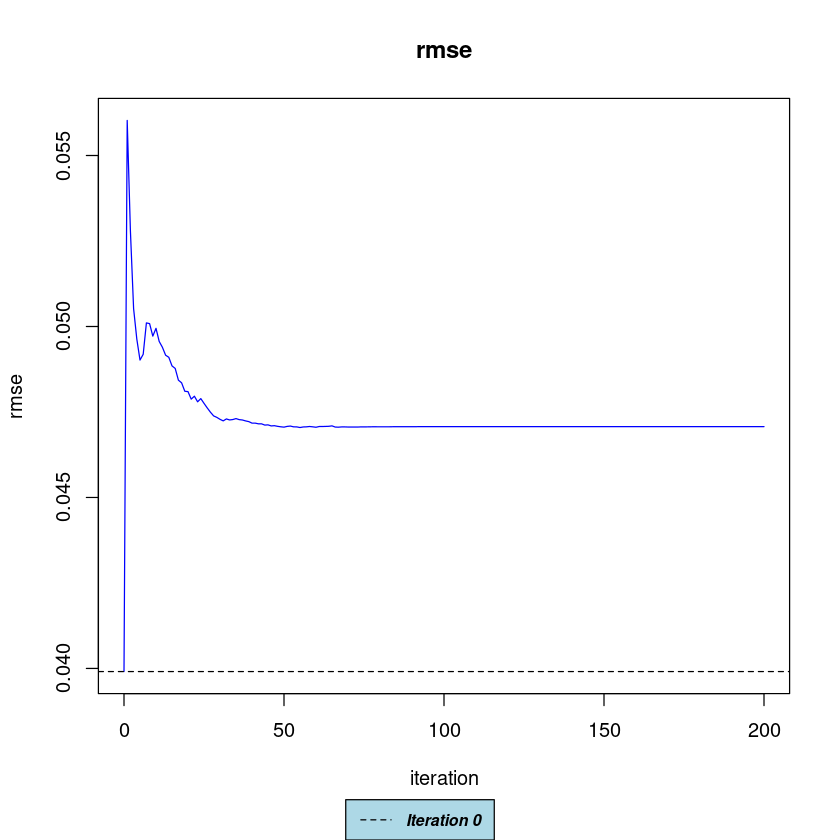

In [17]:
regressors <- list(lm = lm, knn = caret::knnreg)

model <- ssr("pulloff ~ .", regressors = regressors, regressors.params = list(NULL, list(k=5)), L$trainset, U, testdata = L$testset, gr = 10, maxits = 200, pool.size = 750)

plot(model)

preds <- predict(model, L$testset)

sqrt(mean((preds - L$testset$pulloff)^2))